In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("./data/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
dt_features = df.drop(columns="target", axis=1)
dt_target = df["target"]

In [4]:
dt_features = StandardScaler().fit_transform(dt_features)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    dt_features, dt_target, test_size=0.3, random_state=42)

In [6]:
pca = PCA(n_components=3)
pca.fit(X_train)

,n_components,3
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [7]:
ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train)

,n_components,3
,whiten,False
,copy,True
,batch_size,10


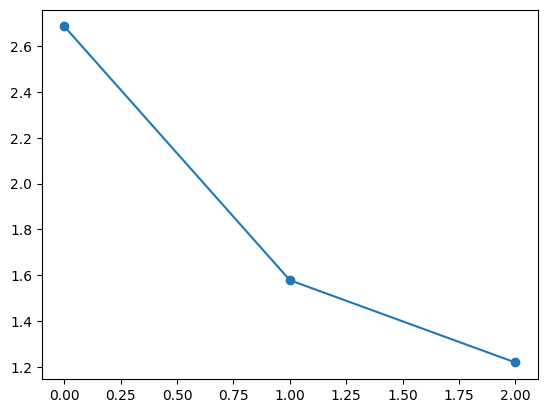

In [8]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_, marker='o', label='PCA')
plt.show()

In [11]:
logistic = LogisticRegression(solver='lbfgs', max_iter=1000)

In [13]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print("PCA Test Score:", logistic.score(dt_test, y_test))

PCA Test Score: 0.7857142857142857


In [14]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("IPCA Test Score:", logistic.score(dt_test, y_test))

IPCA Test Score: 0.8051948051948052
